In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Lr_Tiwar_college\Datasets\OnlineRetail(ABA).csv", encoding= 'unicode_escape')
df = data.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


##  Observation:
    - 4.611 is mean value of this dataset
    - 96.75 is standard deviation 
    - most UnitPrice lies between -11062 to 4.13 
    - There are nulls in description and CustomerID

In [6]:
df[df["UnitPrice"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [7]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Null values:
- Description = 1454
- CustomerID = 135080

In [8]:
df_cleaned = df.dropna(subset = "CustomerID")

In [9]:
df_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

C:\Users\hp\AppData\Local\Temp\ipykernel_15140\2178244888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [11]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [13]:
#Converting InvoiceDate to datetime and creating new data tables named Month and Hour
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour
df_cleaned['Date']=df_cleaned['InvoiceDate'].dt.date

C:\Users\hp\AppData\Local\Temp\ipykernel_15140\642865544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
C:\Users\hp\AppData\Local\Temp\ipykernel_15140\642865544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
C:\Users\hp\AppData\Local\Temp\ipykernel_15140\642865544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [14]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price,Year,Month,Hour,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,8,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,8,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,8,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,8,2010-12-01


In [15]:
revenue_by_country = df_cleaned.groupby('Country')['Total Price'].sum().sort_values(ascending = False)  

In [16]:
revenue_by_country

Country
United Kingdom          6767873.394
Netherlands              284661.540
EIRE                     250285.220
Germany                  221698.210
France                   196712.840
Australia                137077.270
Switzerland               55739.400
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29059.810
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6994.250
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2667.070
Malta                      2505.470
United Arab Emirates

In [17]:
monthly_revenue = df_cleaned.groupby('Month')['Total Price'].sum()
monthly_revenue

Month
1      475074.380
2      436546.150
3      579964.610
4      426047.851
5      648251.080
6      608013.160
7      574238.481
8      616368.000
9      931440.372
10     974603.590
11    1132407.740
12     897110.400
Name: Total Price, dtype: float64

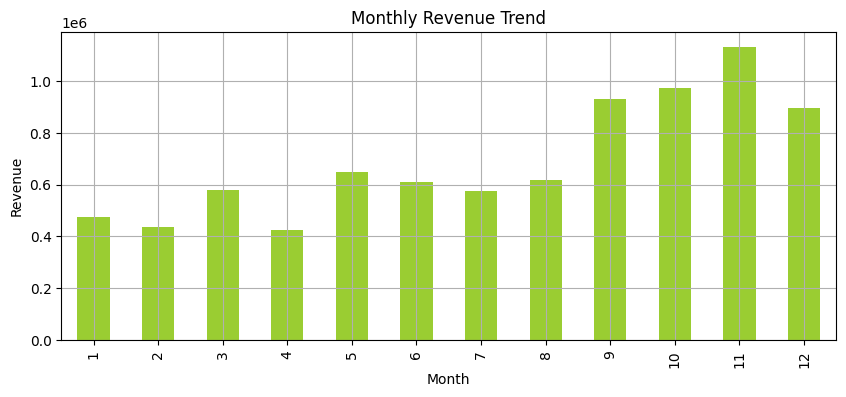

In [18]:
plt.figure(figsize=(10, 4))
monthly_revenue.plot(kind='bar', color='yellowgreen')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [19]:
top_products = df_cleaned.groupby('Description')['Total Price'].sum().sort_values(ascending=False).head(10)
top_products

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: Total Price, dtype: float64

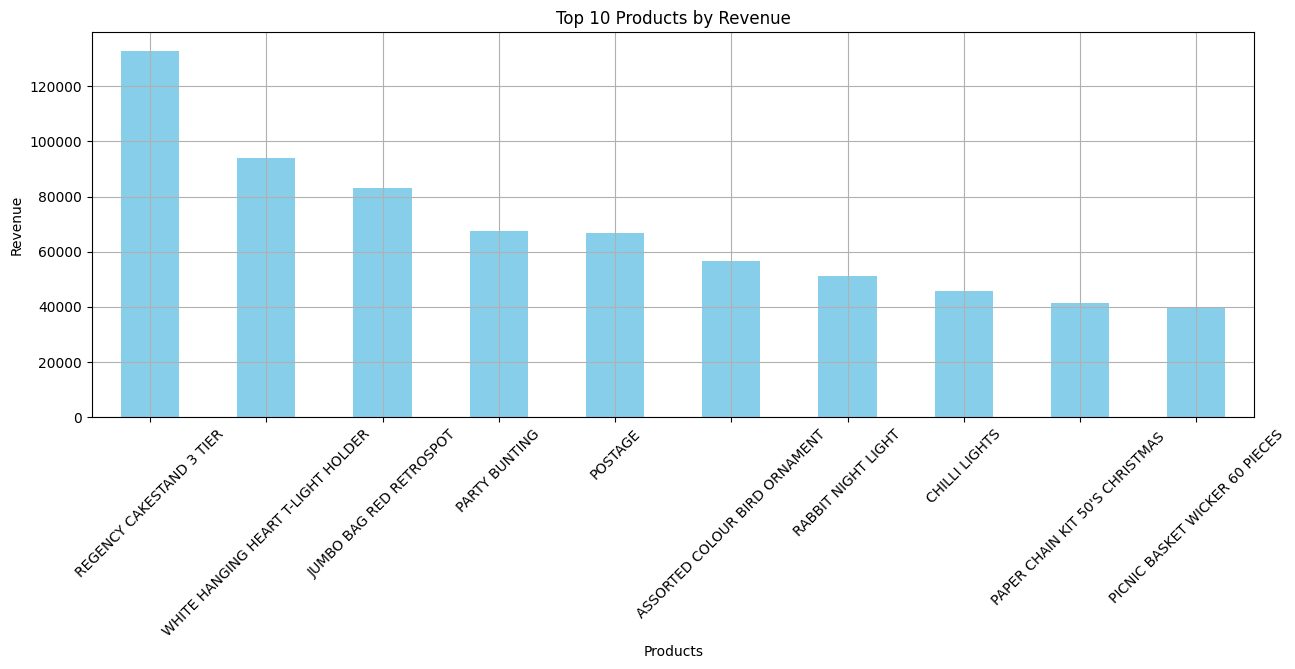

In [20]:
plt.figure(figsize= (15,5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Products')
plt.xticks(rotation=45)
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [33]:
data_oct_nov_dec = df_cleaned[df_cleaned['Month'].isin([10, 11, 12])]
product_sales = data_oct_nov_dec.groupby(['Description', 'Month', 'Country'])['Total Price'].sum().reset_index()
top_products = product_sales.sort_values(by='Total Price', ascending=False)
top_n_products = top_products.head(10)
top_n_products

,Description,Month,Country,Total Price
13337,REGENCY CAKESTAND 3 TIER,12,United Kingdom,18221.28
10993,PAPER CHAIN KIT 50'S CHRISTMAS,11,United Kingdom,15289.76
18434,WHITE HANGING HEART T-LIGHT HOLDER,11,United Kingdom,12112.48
12427,RABBIT NIGHT LIGHT,11,United Kingdom,11867.54
1795,BLACK RECORD COVER FRAME,12,United Kingdom,11207.09
8212,JUMBO BAG RED RETROSPOT,11,United Kingdom,9887.87
3475,CHILLI LIGHTS,11,United Kingdom,9736.13
18440,WHITE HANGING HEART T-LIGHT HOLDER,12,United Kingdom,9693.79
4769,DOORMAT KEEP CALM AND COME IN,10,United Kingdom,9262.22
7638,HOT WATER BOTTLE KEEP CALM,11,United Kingdom,8998.35
